In [17]:
 # importing helper functions
 !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-27 03:55:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-27 03:55:50 (100 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [18]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys,calculate_results

In [19]:
# import data and unzipping it
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2024-08-27 03:55:52--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2024-08-27 03:55:52 (124 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# **Becoming one with the data and Visualizing it**

In [20]:
# for visualizing csv file we need pandas
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [22]:
# shiffling training dataset
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [23]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
# counting total number of one and zeroes in target column of train_df
train_df.target.value_counts()


,count
target,
0,4342
1,3271


In [25]:
# total number of sample
len(train_df),len(test_df)

(7613, 3263)

## **VISUALIZATION**

In [26]:
# now its time to visualize random training examples
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
http://t.co/JwIv6WYW6F Osage Beach releases name

---

Target: 0 (not real disaster)
Text:
Drunk Meals 101: What To Cook When You're Totally Obliterated http://t.co/QvS7O10bG3

---

Target: 1 (real disaster)
Text:
Drunk Meals 101: What To Cook When You're Totally Obliterated http://t.co/m19iVWrdkk

---

Target: 0 (not real disaster)
Text:
U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/x2Wn7O2a3w via @Change

---

Target: 1 (real disaster)
Text:
#Australia #News ; #Japan marks 70th anniversary of #Hiroshima atomic bombing  http://t.co/7aD0L7cgee READ MORE; http://t.co/hHzQl9tzNP

---



## **SPILITTING DATA INTO TRAINING AND VALIDATION DATA**

In [27]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [28]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [29]:
# viewing first 10 training sentences
train_sentences[:10]


array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [30]:
# viewing first 10 train labels
train_labels[:10]


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

## **IMPORTANT FROM NOW ONWARDS**
# **CHANGING OUR TEXT INTO THE NUMBERS**

**TEXT VECTORIZATION**

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorize=TextVectorization(max_tokens=None,
                                 standardize="lower_and_strip_punctuation",
                                 split="whitespace",
                                 ngrams=None,
                                 output_mode="int",
                                 output_sequence_length=None)
                                # pad_to_max_tokens=True) --not valid if you are using max_token

In [32]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [33]:
# finding the average number of tokens in training tweet
round((sum([len(i.split())for i in train_sentences]))/len(train_sentences))

15

In [34]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [35]:
text_vectorizer.adapt(train_sentences)

In [36]:
# Create sample sentence and tokenize it
sample_sentence = "hello myself ram i get kidnapped!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1400,  736, 9370,    8,   52, 2074,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [37]:
# choose a random sentence from training dataset and tokenize it.
import random
random_sentence=random.choice(train_sentences)
print(f"random_sentence is:\n{random_sentence}")
print()
print(f"vectorized version is\n:{text_vectorizer([random_sentence])}")

random_sentence is:
@NBCNews Yea bombing #pearlharbor not so good of an idea!

vectorized version is
:[[3600 3235  156 9882   34   28  136    6   39 1078    0    0    0    0
     0]]


In [38]:
# get unique word in a vocabulary
words_in_vocab= text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]       # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:]   # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")



Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# **CREATE AN EMBEDDING USING AN EMBEDDING LAYER**

We can see what an embedding of a word looks like by using the **tf.keras.layers.Embedding layer.**

The main parameters we're concerned about here are:

1. **input_dim** - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
2. **output_dim** - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
3. **embeddings_initializer** - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
4. **input_length** - Length of sequences being passed to embedding layer.

In [39]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding= layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            input_length=max_length,
                            name="embedding_layer")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
# choose a random sentence from the training_sentence and embedded it
random_sentence_embedded=random.choice(train_sentences)
print(f"random sentence for embedding is:/n{random_sentence_embedded}")
print()
# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence_embedded]))
sample_embed

random sentence for embedding is:/nTake this China get demolished and sent back to the fucking stone age



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04671878, -0.03758879, -0.04594154, ...,  0.04716725,
         -0.00682427,  0.00332314],
        [ 0.00699025,  0.00539088,  0.03270547, ..., -0.01468775,
          0.01046938, -0.04322174],
        [ 0.0395211 ,  0.00467578, -0.01948786, ..., -0.04501212,
         -0.04629534, -0.02808203],
        ...,
        [ 0.029877  ,  0.01391688, -0.02727797, ...,  0.01219711,
         -0.02607939, -0.03991965],
        [ 0.01938589,  0.04719632,  0.03973642, ..., -0.02278095,
         -0.02391504, -0.02681161],
        [ 0.01938589,  0.04719632,  0.03973642, ..., -0.02278095,
         -0.02391504, -0.02681161]]], dtype=float32)>

In [41]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-4.67187762e-02, -3.75887863e-02, -4.59415428e-02,  4.76679541e-02,
       -1.44963339e-03,  2.22038142e-02, -3.95137891e-02, -1.70460828e-02,
        2.93341912e-02, -3.46809514e-02, -3.10940985e-02, -1.68005824e-02,
        2.49843113e-02, -8.06389004e-03,  1.51317753e-02,  4.17243876e-02,
        2.80505307e-02,  1.94986500e-02,  1.36954300e-02, -1.83477998e-02,
       -4.32837009e-03, -4.50341962e-02,  2.87315510e-02,  3.96206230e-03,
        3.18760611e-02,  1.01467855e-02,  3.50841768e-02,  3.91315483e-02,
       -3.62058878e-02, -3.00978664e-02, -2.16899402e-02,  1.72032043e-03,
        2.94296406e-02,  7.65100121e-05,  4.03266065e-02, -1.75536647e-02,
        2.95238383e-02, -1.84493549e-02, -7.98705965e-03,  1.71252526e-02,
        1.89416073e-02,  4.93727587e-02, -1.89492945e-02,  9.02716070e-03,
        1.03023052e-02,  1.33498050e-02,  2.33719461e-02, -4.72845919e-02,
       -5.99838793e-04,  4.60533611e-02, -2.15442106

# **MODELLING WITH THE TEXT DATASET**(Running a series of experiment's)
More specifically, we'll be building the following:

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data

# **MODEL 0**: NAIVE BAYES ( baseline model)

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a **Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers** and then model them with the Multinomial Naive Bayes algorithm

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0=Pipeline([
    ("tfid",TfidfVectorizer()), # convert text to numbers
    ("clf",MultinomialNB())   # model the text

])

# fitting the model to training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [43]:
# evaluate our baseline model
baseline_model_score=model_0.score(val_sentences,val_labels)
print(f"our baseline model score is: \n{baseline_model_score*100:.2f}%")

our baseline model score is: 
79.27%


In [44]:
# make prediction
baseline_model_pred=model_0.predict(val_sentences)
baseline_model_pred[0:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# **creating a function for evalaution of our model**
let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score

🔑 Note: Since we're dealing with a classification problem, the above metrics are the most appropriate.

In [45]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calcuate_results(y_true,y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [46]:
baseline_results=calcuate_results(y_true=val_labels,
                  y_pred=baseline_model_pred)

In [47]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# **MODEL 1**: Feed-forward neural network (**dense model**)

In [48]:
# create a tensorboard callback
from helper_functions import create_tensorboard_callback

# create a directory to save tensorboard log
SAVE_DIR="model_logs"

In [49]:
# Build a model with Functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string) # fetching input as text
x=text_vectorizer(inputs)
x=embedding(x)
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [50]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_layer (Embedding)          │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [52]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240827-035554
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/tensorboard.py:667: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6405 - loss: 0.6509 - val_accuracy: 0.7612 - val_loss: 0.5354
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8066 - loss: 0.4678 - val_accuracy: 0.7927 - val_loss: 0.4746
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8528 - loss: 0.3634 - val_accuracy: 0.7966 - val_loss: 0.4622
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8857 - loss: 0.2970 - val_accuracy: 0.7874 - val_loss: 0.4681
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9057 - loss: 0.2482 - val_accuracy: 0.7769 - val_loss: 0.4836


In [53]:
# evaluating it
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.5158


[0.48364073038101196, 0.7769029140472412]

In [54]:
# make prediction and evaluating it
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([[3.28996569e-01],
       [7.34534204e-01],
       [9.97789741e-01],
       [1.89822480e-01],
       [9.97216925e-02],
       [9.42521930e-01],
       [8.95433187e-01],
       [9.94333982e-01],
       [9.62197840e-01],
       [3.80900085e-01],
       [1.23831041e-01],
       [7.05145419e-01],
       [3.90062407e-02],
       [2.46043146e-01],
       [4.24915645e-03],
       [1.54950157e-01],
       [2.29637139e-02],
       [7.53095150e-02],
       [2.67096937e-01],
       [5.34985960e-01],
       [9.03853774e-01],
       [4.22058180e-02],
       [3.66915226e-01],
       [1.08511128e-01],
       [9.46890712e-01],
       [9.98862386e-01],
       [4.41166461e-02],
       [6.53793439e-02],
       [2.31062956e-02],
       [2.00263694e-01],
       [5.99747837e-01],
       [3.30624551e-01],
       [5.24938881e-01],
       [1.57817483e-01],
       [4.18865383e-01],
       [6.19560853e-02],
       [9.96063173e-01],
       [2.06967279e-01],
       [3.32529433e-02],
       [9.98704314e-01],


In [55]:
import numpy as np

np.round(model_1_pred_probs[0]),val_labels[0]

(array([0.], dtype=float32), 0)

In [56]:
# Round out predictions and reduce to 1-dimensional array
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))

# calculate model 2 results
model_1_results=  calcuate_results(y_true=val_labels, y_pred=model_1_pred)
model_1_results

{'accuracy': 77.69028871391076,
 'precision': 0.7798819103655997,
 'recall': 0.7769028871391076,
 'f1': 0.7743498017353971}

# **VISULAZING LEARNED EMBEDDINGS**

In [57]:
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[0:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [58]:
# get the weight matrix of embedding layer
# (these are the numerical representation of each token in our training data)
embed_weights=model_1.get_layer("embedding_layer").get_weights()
embed_weights[0]


array([[ 0.02557274,  0.04829991,  0.0436557 , ..., -0.02547036,
        -0.03223529, -0.03635564],
       [-0.02935966,  0.02777586,  0.03029151, ..., -0.04949431,
         0.00316111,  0.02564764],
       [-0.00764561,  0.03432943, -0.01534967, ..., -0.01332443,
        -0.03027177, -0.01914836],
       ...,
       [ 0.00115604,  0.04710287,  0.01567621, ...,  0.00016892,
         0.01992036, -0.00969188],
       [ 0.03276298,  0.08437194,  0.04783018, ..., -0.04842814,
        -0.01816805, -0.01331091],
       [ 0.06809836,  0.06834454,  0.03093811, ..., -0.04535054,
        -0.10988707, -0.01346146]], dtype=float32)

## **Recurrent Neural Network** (RNN's)
A **Recurrent Neural Network** (RNN) is a type of artificial neural network designed to recognize patterns in sequences of data, such as time series or natural language.

Improvements Over Basic RNNs:

-> To address the vanishing gradient problem, advanced RNN architectures have been developed, such as:

* **Long Short-Term Memory** (LSTM): Incorporates gates to control the flow of information, allowing the network to "remember" or "forget" information over longer periods.
* **Gated Recurrent Unit** (GRU): A simplified version of LSTMs that also helps with long-term dependencies, using fewer parameters.
* **Bidirectional RNN's** : Bidirectional RNN's passes forward and backward along a sequence, left to right and right to left.

# **MODEL 2**: LSTM MODEL
* long short term memory
* variant of RNN.

In [59]:
# setting random seeds
tf.random.set_seed(42)

# creating embedding layer
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# creating model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),name="input_layer",dtype=("string"))
x=text_vectorizer(inputs)
x=model_2_embedding(x)
#x=layers.LSTM(units=64,return_sequences=True)(x)
x=layers.LSTM(units=64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="LSTM_model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [60]:
model_2.summary()


Model: "LSTM_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
 # compiling the model
 model_2.compile(loss=tf.keras.losses.BinaryCrossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [62]:
# fitting the model
history_2=model_2.fit(train_sentences,
                      train_labels,
                      epochs=5,
                      validation_data=(val_sentences,val_labels),
                      callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="LSTM_model_2")])

Saving TensorBoard log files to: model_logs/LSTM_model_2/20240827-035609
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/tensorboard.py:667: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6758 - loss: 0.5816 - val_accuracy: 0.7769 - val_loss: 0.4595
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8666 - loss: 0.3288 - val_accuracy: 0.7520 - val_loss: 0.5213
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9149 - loss: 0.2271 - val_accuracy: 0.7454 - val_loss: 0.6667
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9501 - loss: 0.1481 - val_accuracy: 0.7638 - val_loss: 0.6521
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9567 - loss: 0.1335 - val_accuracy: 0.7703 - val_loss: 0.6284


In [63]:
# make prediction by our LSTM model
model_2_pred_prob=model_2.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [64]:
np.round(model_2_pred_prob[0])

array([0.], dtype=float32)

In [65]:
model_2_pred_prob[:20]

array([[0.07710304],
       [0.9689079 ],
       [0.997068  ],
       [0.03913005],
       [0.00753914],
       [0.93655545],
       [0.3037262 ],
       [0.9980172 ],
       [0.99501413],
       [0.43396258],
       [0.01971198],
       [0.2680072 ],
       [0.00921259],
       [0.4289456 ],
       [0.00509805],
       [0.02104708],
       [0.01319738],
       [0.0192828 ],
       [0.07547635],
       [0.82010967]], dtype=float32)

In [66]:
val_labels[0]

0

In [67]:
# Round out predictions and reduce to 1-dimensional array
model_2_pred = tf.squeeze(tf.round(model_2_pred_prob))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [68]:
# calculate model 2 results
model_2_results=  calcuate_results(y_true=val_labels, y_pred=model_2_pred)
model_2_results

{'accuracy': 77.03412073490814,
 'precision': 0.7760118694840564,
 'recall': 0.7703412073490814,
 'f1': 0.7665375100103654}

# **MODEL 3**: GRU
* gated recurrent unit
* Another popular and effective RNN component is the GRU or gated recurrent unit.

To use the GRU cell in TensorFlow, we can call the **tensorflow.keras.layers.GRU() class.**

The architecture of the GRU-powered model will follow the same structure we've been using:

**Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)**

Again, the only difference will be the layer(s) we use between the embedding and the output.

In [69]:
from tensorflow.keras import layers
# setting random seed
tf.random.set_seed(42)

#  creating embedding for GRU
model_3_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer="uniform")

# creating model 3
inputs=layers.Input(shape=(1,),dtype="string",name="input_layer")
x=text_vectorizer(inputs)
x=model_3_embedding(x)
x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [70]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [72]:
# fitting the model
history_model_3=model_3.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240827-035625
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/tensorboard.py:667: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6393 - loss: 0.6106 - val_accuracy: 0.7743 - val_loss: 0.4605
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8587 - loss: 0.3427 - val_accuracy: 0.7546 - val_loss: 0.5358
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9103 - loss: 0.2402 - val_accuracy: 0.7559 - val_loss: 0.6094
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9403 - loss: 0.1622 - val_accuracy: 0.7651 - val_loss: 0.6161
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9588 - loss: 0.1315 - val_accuracy: 0.7559 - val_loss: 0.6568


In [73]:
# predicting through our model
model_3_pred_prob=model_3.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [74]:
np.round(model_3_pred_prob[5])

array([1.], dtype=float32)

In [75]:
val_labels[5]

1

In [76]:
model_3_pred_prob[:20]

array([[0.06518997],
       [0.92584324],
       [0.9902982 ],
       [0.27950343],
       [0.00898783],
       [0.98585445],
       [0.21642849],
       [0.99644667],
       [0.99076486],
       [0.7544893 ],
       [0.01099435],
       [0.59489816],
       [0.01581424],
       [0.37469104],
       [0.00596643],
       [0.05522661],
       [0.01056598],
       [0.01016943],
       [0.11268909],
       [0.9540292 ]], dtype=float32)

In [77]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_prob))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [78]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.59055118110236,
 'precision': 0.7578854326598573,
 'recall': 0.7559055118110236,
 'f1': 0.7532626479990396}

#**MODEL 4**: BI-DIRECTIONAL RNN
* A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.
* In practice, many sequence models often see and improvement in performance when using bidirectional RNN's
* However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

In [79]:
from tensorflow.keras import layers


model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     name="embedding_4")


# setting seed
tf.random.set_seed(42)

# creating model 3
inputs=layers.Input(shape=(1,),dtype="string",name="input_layer")
x=text_vectorizer(inputs)
x=model_4_embedding(x)
x=layers.Bidirectional(layers.LSTM(63))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bi-directional")

In [80]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240827-035636
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6769 - loss: 0.5810 - val_accuracy: 0.7861 - val_loss: 0.4592
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8646 - loss: 0.3288 - val_accuracy: 0.7703 - val_loss: 0.5089
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9144 - loss: 0.2231 - val_accuracy: 0.7493 - val_loss: 0.6105
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9493 - loss: 0.1421 - val_accuracy: 0.7428 - val_loss: 0.6963
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9615 - loss: 0.1209 - val_accuracy: 0.7677 - val_loss: 0.7343


In [82]:
# predicting through our model
model_4_pred_prob=model_4.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [83]:
model_4_pred_prob[:10]

array([[0.02227972],
       [0.94507164],
       [0.9997794 ],
       [0.01905067],
       [0.00834056],
       [0.9926548 ],
       [0.40275896],
       [0.99975985],
       [0.9988977 ],
       [0.69878095]], dtype=float32)

In [84]:
np.round(model_4_pred_prob[1])

array([1.], dtype=float32)

In [85]:
val_labels[1]

0

In [86]:
# convert prediction between 0 and 1
model_4_pred=tf.squeeze(tf.round(model_4_pred_prob))
model_4_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [87]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_pred)
model_4_results

{'accuracy': 76.77165354330708,
 'precision': 0.7801124232948082,
 'recall': 0.7677165354330708,
 'f1': 0.7615317957393009}

 nm jsbjdsb s  # Convolutional Neural Network (and other types of sequence data)

* The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).
* So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

* A typical CNN architecture for sequences will look like the following:

* **Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)**

In [110]:
# create a 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string",name="input_layer")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=5,
                activation="relu",
                padding="valid",
                strides=1)(x)
x=layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
#Passing inputs and outputs to the model 5
model_5=tf.keras.Model(inputs,outputs,name="conv1D_neural_networks")

In [113]:
# Example of compiling the model
model_5.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use string instead of `tf.keras.losses.BinaryCrossentropy()`
    metrics=['accuracy']
)



In [103]:
# fitting the modele
hist_5=model_5.fit(train_sentences,
                   train_labels,
                   epochs=5,
                   validation_data=(val_sentences,val_labels),
                   callbacks=[create_tensorboard_callback(dir_name="SAVE_DIR",experiment_name="Conv1D")]
                   )

Saving TensorBoard log files to: SAVE_DIR/Conv1D/20240827-040141
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/tensorboard.py:667: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9310 - loss: 0.1950 - val_accuracy: 0.7795 - val_loss: 0.8007
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9703 - loss: 0.0862 - val_accuracy: 0.7677 - val_loss: 0.8961
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9751 - loss: 0.0694 - val_accuracy: 0.7730 - val_loss: 0.9406
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9763 - loss: 0.0629 - val_accuracy: 0.7743 - val_loss: 0.9697
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9760 - loss: 0.0588 - val_accuracy: 0.7782 - val_loss: 0.9808


In [91]:
# predicting through our model
model_5_pred_probs=model_5.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [92]:
# prediction on a particular indexing
print(f"predicted value on that index: {np.round(model_5_pred_probs[2])}")

# actual value on that index
print(f"actulal value of that index: {val_labels[2]}")

predicted value on that index: [1.]
actulal value of that index: 1


In [93]:
# squeezing value between 0 to 1
model_5_pred=tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [94]:
# Calculate CNN's(1-D) model results
model_5_results = calculate_results(val_labels, model_5_pred)
model_5_results

{'accuracy': 76.9028871391076,
 'precision': 0.7686512691006243,
 'recall': 0.7690288713910761,
 'f1': 0.7685783875130696}

# **Using Pretrained Embeddings (transfer learning for NLP)**
* The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

* **Our embedding layer also outputs an a 128 dimensional vector** for each word, where as, **the Universal Sentence Encoder outputs a 512 dimensional vector** for each sentence.

In [95]:
sample_sentence

'hello myself ram i get kidnapped!'

In [96]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_sample=embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_sample[0][:50])

tf.Tensor(
[ 0.05243554 -0.01991722  0.00869413 -0.04072491  0.0480014  -0.00727034
  0.01776586 -0.0242346   0.010509   -0.02665792  0.09139082  0.06661649
 -0.02569999  0.05336045 -0.00973073 -0.07025386 -0.01692817 -0.07330479
 -0.01472564 -0.06273378 -0.03660143 -0.03970446 -0.0317984  -0.02937189
  0.02615621 -0.01399191  0.04986278 -0.06204003  0.01702769  0.06082724
  0.06801747  0.06055363 -0.07269911 -0.05789809  0.00174792  0.03278537
 -0.04541065  0.02789726  0.07763848 -0.02478798  0.0297179  -0.01623836
 -0.02415786  0.06493546 -0.03467801 -0.06686259 -0.06723221 -0.03659465
  0.06258328 -0.02317914], shape=(50,), dtype=float32)


In [97]:
embed_sample

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.05243554, -0.01991722,  0.00869413, ...,  0.03635212,
         0.05894758, -0.07590068],
       [ 0.03596688, -0.08579469, -0.01152739, ..., -0.03414335,
         0.02816022, -0.00878944]], dtype=float32)>

# Building, Training and evaluating a transfer learning model for NLP

In [98]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers

# Use the Universal Sentence Encoder (USE) directly
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],  # shape of inputs coming to our model
                                        dtype=tf.string,  # data type of inputs (string)
                                        trainable=False,  # use pretrained weights
                                        name="USE")

# Set random seed
tf.random.set_seed(42)

# Creating the model
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")  # Input layer
x = layers.Lambda(lambda x: tf.squeeze(x, axis=1))(inputs)  # Reshape input from (None, 1) to (None,)
x = sentence_encoder_layer(x)  # Pass input directly to the USE layer
outputs = layers.Dense(1, activation="sigmoid")(x)  # Output layer

model_6 = tf.keras.Model(inputs, outputs, name="model_6")

# Compile the model
model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_6.summary()


TypeError: Exception encountered when calling layer 'USE' (type KerasLayer).

Binding inputs to tf.function failed due to `A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
`. Received args: (<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_25>,) and kwargs: {} for signature: (inputs: TensorSpec(shape=<unknown>, dtype=tf.string, name=None)).

Call arguments received by layer 'USE' (type KerasLayer):
  • inputs=<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_25>
  • training=None

# **Comparing the performance of each of our models**

In [99]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results})

all_model_results.transpose()

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,77.690289,0.779882,0.776903,0.774350
lstm,77.034121,0.776012,0.770341,0.766538
gru,75.590551,0.757885,0.755906,0.753263
bidirectional,76.771654,0.780112,0.767717,0.761532
conv1d,76.902887,0.768651,0.769029,0.768578


# **SAVING AND LOADING A TRAINED MODEL**
There a 2 main format to save a model in a tensorflow are:
1. The **HDF5 Format** (Hierarchical data format version5)
2. The **'SavedModel'** format (this is the default tensorflow format)



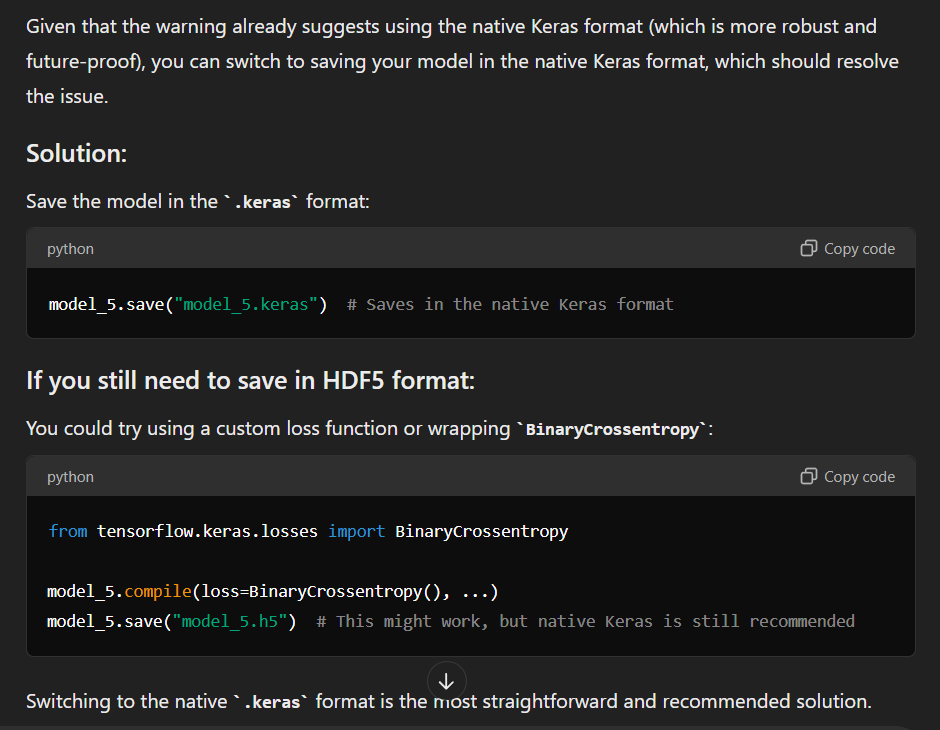

In [114]:
# saving model5
from tensorflow import keras
keras.saving.save_model(model_5, 'model_5.keras')

# 2nd method to saving model
# model_5.save("model_5.h5")

In [115]:
# loading a model
import tensorflow as tf
import tensorflow_hub as hub
loaded_model_5=tf.keras.models.load_model("/content/model_5.keras")  # must required hdf5 format

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [117]:
loaded_model_5

<Functional name=conv1D_neural_networks, built=True>

In [118]:
loaded_model_5.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4757 - loss: 0.6988


[0.7011041641235352, 0.4606299102306366]